## Лабораторная работа №6

**Петров Кирилл**

In [7]:
%matplotlib inline  
import matplotlib.pyplot as plt
import numpy as np
import math
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
plt.rcParams.update({'font.size': 14})
np.random.seed(777)

### Задача №1

#### Задание:
1. Сгенерировать случайную эрмитовую матрицу $A$ размера $N$
2. Найти ее собственные значения и векторы численно
3. Показать, что при $N \to \infty$ плотность распределения собственных значений подчиняется полукруговому распределению Вигнера
4. Показать, что распределение межуровневых расстояний $s$ случайной эрмитовой матрицы близко к распределению Вигнера-Дайсона

#### Решение:

Генерация комплекснозначной матрицы $A$ размера $N$ состоит из следующих шагов:
- Генерация действительных и мнимых частей элементов $d_{mn} = b_{mn} + ic_{mn}$ матрицы $D$, где $b_{mn} ∈ R$ и $c_{mn} ∈ R$ – случайные переменные, распределенные согласно нормальному (Гауссову) распределению с единичной дисперсией.
- Вычисление матрицы $A = \frac{(D + D^†)}{2}$, где $D^†$ – матрица, эрмитово сопряженная матрице $D$.

In [ ]:
def generate_random_hermite(n):
    B = np.random.normal(0.0, 1.0, (n, n))
    C = np.random.normal(0.0, 1.0, (n, n))
    D = np.matrix(B + 1j * C)
    A = (D + D.H)*0.5
    return A

generate_random_hermite(2)

Таким образом, мы получаем искомую случайную матрицу, которая является членом гауссова унитарного ансамбля (GUE) – ансамбля многих эрмитовых матриц, действительные и мнимые части элементов которых имеют гауссово распределение. Системы, которые описываются гауссовым унитарным ансамблем, лишены какой-либо симметрии – они неинвариантны относительно обращения времени (таким свойством обладают, например, системы во внешнем магнитном поле).

Данные матрицы имеют $N$ собственных чисел. Если их нормировать на $\sqrt N$, то плотность описывается полукруговым законом Вигнера:

$$
W_{sc}(\lambda \sqrt N) = \frac{1}{2\pi}\sqrt {4 - \lambda ^2}
$$

Построим гистограмму распределения собственных значений

In [3]:
n = 2000
eigvals = np.real(np.linalg.eigvals(generate_random_hermite(n)))
normeigvals = eigvals/np.sqrt(n)

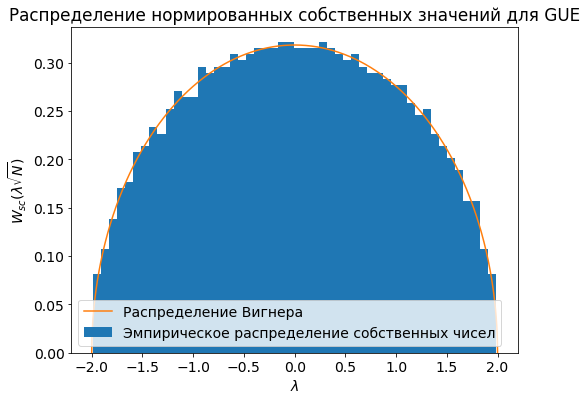

In [4]:
fig, (ax) = plt.subplots(1, 1, figsize=(8,6), sharex=True)
ax.hist(normeigvals, bins=50, density=True, label='Эмпирическое распределение собственных чисел')
l = np.linspace(-2, 2, n)
Wsc = np.sqrt(4 - l**2)/(2*np.pi)
ax.plot(l, Wsc, label='Распределение Вигнера')
ax.set_xlabel(r'$\lambda $')
ax.set_ylabel(r'$W_{sc}(\lambda \sqrt{N})$')
ax.set_title(r'Распределение нормированных собственных значений для GUE')
ax.legend()
pass

Видно, что гистограмма распределения случайных величин схожа с теоритическим распределение Вигнера. Найдем теперь расщепление уровней. Упорядочим набор собственных чисел матрицы $A$ по возрастанию, тогда расщепление уровней есть величина:

$$s_i = \lambda _{i+1} - \lambda _i, i = \overline {1, N - 1}$$

In [5]:
sl = np.diff(sorted(eigvals))

Оно должно подчиняться распредлению Вигнера-Дайсона:

$$ P(s) = \frac{32}{\pi ^2}s^2e^{-\frac{4}{\pi}s^2}  $$

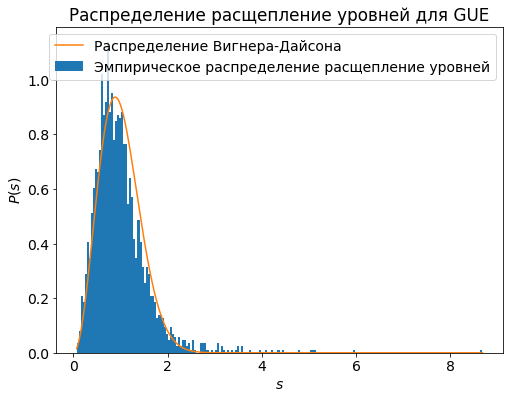

In [6]:
fig, (ax) = plt.subplots(1, 1, figsize=(8,6), sharex=True)
_, bins, _ = ax.hist(sl/np.mean(sl), bins=200, density=True, label='Эмпирическое распределение расщепление уровней')
s = np.linspace(np.min(bins), np.max(bins), 1000)
P = (32.0 / (np.pi**2)) * s**2 * np.exp(-4.0 / np.pi * s**2 ) 
ax.plot(s, P, label='Распределение Вигнера-Дайсона')
ax.legend()
ax.set_xlabel(r'$s$')
ax.set_ylabel(r'$P(s)$')
ax.set_title(r'Распределение расщепление уровней для GUE')
pass

Гистограмма распределения почти совпадает с теоритическим рапсределением.